In [1]:
import qiskit
import numpy as np

from utils import LoadData
from QVC import VariationalClassifier
from qiskit.circuit.library import PauliFeatureMap

In [2]:
# Define quantum feature map
qfm = PauliFeatureMap(feature_dimension = 3, reps = 2, entanglement = 'linear', alpha = 1, paulis = ['Z', 'ZZ'])
qfm.draw()

┌──────────────────────────────────┐
q_0: ┤0                                 ├
     │                                  │
q_1: ┤1 PauliFeatureMap(x[0],x[1],x[2]) ├
     │                                  │
q_2: ┤2                                 ├
     └──────────────────────────────────┘

In [3]:
# Define variational circuit
vc = qiskit.circuit.QuantumCircuit(3)
vcpv = qiskit.circuit.ParameterVector('theta', 16)
for i in range(2):
    vc.ry(vcpv[0+8*i] , 0)
    vc.ry(vcpv[1+8*i] , 1)
    vc.rz(vcpv[2+8*i] , 0)
    vc.rz(vcpv[3+8*i] , 1)
    vc.cz(0, 1)
    vc.ry(vcpv[4+8*i] , 1)
    vc.ry(vcpv[5+8*i] , 2)
    vc.rz(vcpv[6+8*i] , 1)
    vc.rz(vcpv[7+8*i] , 2)
    vc.cz(1, 2)
vc.draw()

┌──────────────┐┌──────────────┐   ┌──────────────┐┌───────────────┐   »
q_0: ┤ Ry(theta[0]) ├┤ Rz(theta[2]) ├─■─┤ Ry(theta[8]) ├┤ Rz(theta[10]) ├───»
     ├──────────────┤├──────────────┤ │ ├──────────────┤└┬──────────────┤   »
q_1: ┤ Ry(theta[1]) ├┤ Rz(theta[3]) ├─■─┤ Ry(theta[4]) ├─┤ Rz(theta[6]) ├─■─»
     ├──────────────┤├──────────────┤   └──────────────┘ └──────────────┘ │ »
q_2: ┤ Ry(theta[5]) ├┤ Rz(theta[7]) ├─────────────────────────────────────■─»
     └──────────────┘└──────────────┘                                       »
«                                                                            »
«q_0: ───────────────────────────────────■───────────────────────────────────»
«      ┌──────────────┐┌───────────────┐ │ ┌───────────────┐┌───────────────┐»
«q_1: ─┤ Ry(theta[9]) ├┤ Rz(theta[11]) ├─■─┤ Ry(theta[12]) ├┤ Rz(theta[14]) ├»
«     ┌┴──────────────┤├───────────────┤   └───────────────┘└───────────────┘»
«q_2: ┤ Ry(theta[13]) ├┤ Rz(theta[15]) ├─────────────────────────────────────»
«     └───────────────┘└───────────────┘                                     »
«        
«q_0: ───
«        
«q_1: ─■─
«      │ 
«q_2: ─■─
«

In [4]:
# Define boolean function
def bf(bs):
    if len([i for i in bs if i == '0']) > len([i for i in bs if i == '1']):
        return 1
    else:
        return -1

In [5]:
# Load Data
TrainData, TrainLabels, TestData, TestLabels = LoadData(0.2, 3)

In [6]:
# Make classifier and train it
qvc = VariationalClassifier(qfm, vc, bf, False)
print(qvc.train(TrainData, (-1)**TrainLabels, 'zzzpfm_c12v3'))

(array([ 1.26059019, -0.58099235, -2.2851347 ,  0.92103586,  0.66120154,
       -0.02403439,  2.58124233,  1.47700102, -1.17662184,  0.34741369,
       -0.01822869,  1.07205698,  0.95121328, -0.78947442,  3.39784276,
        1.22126369]), 0.24763046725286425, 750)


In [7]:
print(qvc.test(TestData, TestLabels))

0.09523809523809523


In [8]:
print(qvc.test(TestData, (-1)**TestLabels))

0.6666666666666666


In [9]:
print(qvc.test(TrainData, (-1)**TrainLabels))

0.7530864197530864


In [10]:
len(TestData)

21

In [11]:
len(TrainData)

81

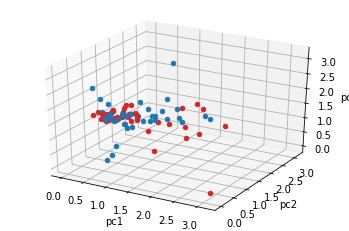

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ['tab:blue', 'tab:red']
for dp, l in zip(TrainData, TrainLabels):
    ax.scatter(dp[0], dp[1], dp[2], c = colors[int(l)])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.savefig('./zzzpfm_c12_train.png')

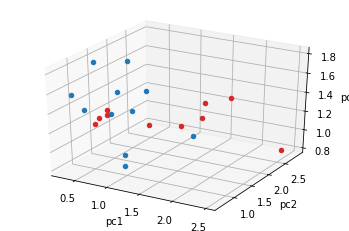

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ['tab:blue', 'tab:red']
for dp, l in zip(TestData, TestLabels):
    ax.scatter(dp[0], dp[1], dp[2], c = colors[int(l)])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.savefig('./zzzpfm_c12_test.png')

In [18]:
np.save('./TrainData_zzpfmc12.npy', TrainData)
np.save('./TestData_zzpfmc12.npy', TestData)
np.save('./TrainLabels_zzpfmc12.npy', TrainLabels)
np.save('./TestLabels_zzpfmc12.npy', TestLabels)